## Load the dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# load and preprocess the dataset
def load_and_preprocess_dataset(filepath):
    dataset = pd.read_csv(filepath, sep='\t', header=0)  
    # Extract features (X) and target variable (y) from the dataset
    # iloc[:, :-1] selects all rows and all columns except the last one as features
    # iloc[:, -1] selects all rows and only the last column as the target variable
    X = dataset.iloc[:, :-1].values  
    y = dataset.iloc[:, -1].values

    # initializase a StandardScaler to standardize the features to have mean=0 and standard deviation=1
    scaler = StandardScaler()
    
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

X, y = load_and_preprocess_dataset('../Normalization/A1-synthetic-normalized.csv')


## Splitting the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-Validation and Model Training

In [13]:
kf = KFold(n_splits=5)
cv_errors = []

# counter for the current fold
fold = 1

# iterates over each train-test split
for train_index, val_index in kf.split(X_train):
    # splitting the data into training and validation sets for the current fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    # logging the size of each split for verification
    print(f"Fold {fold}: Training on {len(train_index)} samples, validating on {len(val_index)} samples.")

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    print(f'Fold {fold} - Coefficients: {model.coef_}')
    print(f'Fold {fold} - Intercept: {model.intercept_}')

    # makes predictions on the validation subset
    y_val_pred = model.predict(X_val_cv)

    error = mean_absolute_percentage_error(y_val_cv, y_val_pred)
    cv_errors.append(error)

    print(f'Fold {fold} - Cross-Validation MAPE: {error * 100:.2f}%\n')

    fold += 1

# calculating the average MAPE across all folds
average_cv_error = np.mean(cv_errors)

# logging the average MAPE for all folds
print(f'Average Cross-Validation MAPE across all folds: {average_cv_error * 100:.2f}%')


Fold 1: Training on 640 samples, validating on 160 samples.
Fold 1 - Coefficients: [-0.00168848  0.16344726  0.01035776  0.14253204 -0.05820294 -0.01323951
  0.06272764  0.12003209  0.83051512]
Fold 1 - Intercept: 0.005481989260426489
Fold 1 - Cross-Validation MAPE: 143.69%

Fold 2: Training on 640 samples, validating on 160 samples.
Fold 2 - Coefficients: [ 0.00203136  0.16916505  0.00490137  0.14361095 -0.06370417 -0.01379359
  0.06391451  0.1216906   0.8382908 ]
Fold 2 - Intercept: 0.0040966894724365766
Fold 2 - Cross-Validation MAPE: 92.64%

Fold 3: Training on 640 samples, validating on 160 samples.
Fold 3 - Coefficients: [-0.00479808  0.53245303  0.01722179  0.14198922 -1.6062543  -0.01215043
  1.64580451  0.12628265  0.83767874]
Fold 3 - Intercept: 0.006760889485403612
Fold 3 - Cross-Validation MAPE: 29.37%

Fold 4: Training on 640 samples, validating on 160 samples.
Fold 4 - Coefficients: [-0.00132116 -0.06842142  0.01051848  0.14194919  0.92913195 -0.00969919
 -0.95275813  0.1

## Final Model Training and Evaluation

In [14]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)

print(f'Final Model Coefficients: {model_final.coef_}')
print(f'Final Model Intercept: {model_final.intercept_}')

y_pred_test = model_final.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test MAPE: {test_mape * 100:.2f}%')


Final Model Coefficients: [-0.0014402   0.20193864  0.00646937  0.14311733 -0.20908797 -0.01173991
  0.21398777  0.12260847  0.83858112]
Final Model Intercept: 0.005072957596983209
Test MAPE: 22.81%


## Visualization of Predictions

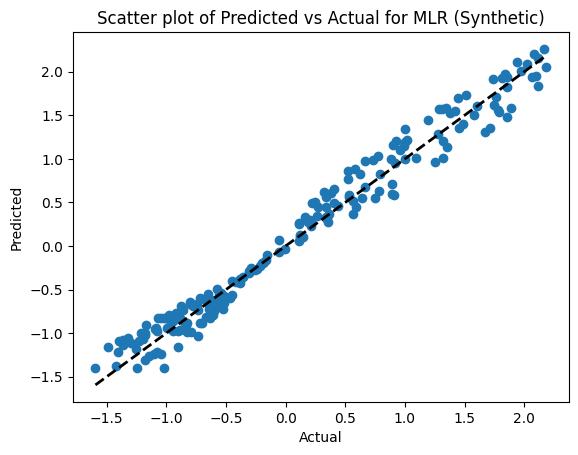

In [15]:
plt.scatter(y_test, y_pred_test)
plt.title('Scatter plot of Predicted vs Actual for MLR (Synthetic)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.show()
